<a href="https://colab.research.google.com/github/BrunoSilva-N/-Redu-o-de-Dimensionalidade-em-Imagens-para-Redes-Neurais/blob/main/conversaocinzabinarizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

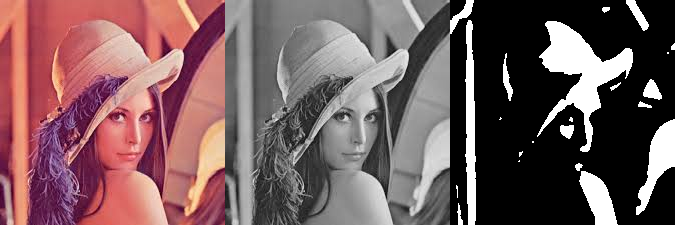

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [26]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


#algoritmo de binarização e conversão  para cinza
def conversao_cinza_binarizacao(imagem, threshold=160, blur_size=(7, 7)):

    igm = cv2.imread(imagem)
    img_gray = cv2.cvtColor(igm, cv2.COLOR_BGR2GRAY) if igm.ndim == 3 else igm.copy()
    img_blurred = cv2.GaussianBlur(img_gray, blur_size, 0)
    _, img_binary = cv2.threshold(img_blurred, threshold, 255, cv2.THRESH_BINARY)

    if igm.ndim == 3:
        img_gray_colorido = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
        img_binary_colorido = cv2.cvtColor(img_binary, cv2.COLOR_GRAY2BGR)
        resultado = np.hstack([igm, img_gray_colorido, img_binary_colorido])
    else:
        resultado = np.hstack([igm, img_gray, img_binary])

    cv2_imshow(resultado)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return {"original": igm, "cinza": img_gray, "binarizada": img_binary}

# Caminho da Imagem escolhida
imagem = "Lena.jpg"

# Aplica a conversão e binarização na imagem
resultados = conversao_cinza_binarizacao(imagem)

# Resultados
if resultados:
    original = resultados["original"]
    cinza = resultados["cinza"]
    binarizada = resultados["binarizada"]
    print(type(original), type(cinza), type(binarizada))